In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

In [2]:
tdata = pd.read_csv('train.csv')

([<matplotlib.patches.Wedge at 0x23541854808>,
 [Text(0.691041971037273, 0.8558393507340738, '1'),
  Text(-0.691041971037273, -0.8558393507340738, '0')],
 [Text(0.3769319842021489, 0.4668214640367675, '28.4%'),
  Text(-0.3769319842021489, -0.4668214640367675, '71.6%')])

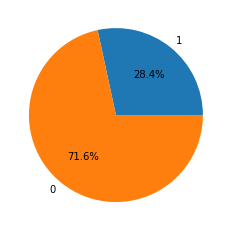

In [3]:
labels = '1','0'
size=[63,159]
plt.pie(size , labels = labels,autopct='%1.1f%%')

In [4]:
null_data=tdata.isnull().sum().sort_values(ascending=False)
not_numeric_cols=tdata.columns[tdata.dtypes =='object'] 
numeric_cols=[ i for i in tdata.columns if i not in not_numeric_cols]

print('不是數字:',list(not_numeric_cols))
print('是數字',list(numeric_cols))
print("缺失值比率:")
print(null_data/len(tdata))


不是數字: ['location', 'country', 'gender', 'sym_on', 'hosp_vis', 'symptom1', 'symptom2', 'symptom3']
是數字 ['id', 'age', 'vis_wuhan', 'from_wuhan', 'death', 'symptom4', 'symptom5', 'symptom6']
缺失值比率:
symptom6      1.000000
symptom5      1.000000
symptom4      1.000000
symptom3      0.941441
symptom2      0.900901
symptom1      0.770270
hosp_vis      0.463964
sym_on        0.463964
age           0.085586
gender        0.049550
death         0.000000
from_wuhan    0.000000
vis_wuhan     0.000000
country       0.000000
location      0.000000
id            0.000000
dtype: float64


In [5]:
tdata['symptom1'] = tdata['symptom1'].fillna('na')

df=pd.crosstab(tdata['symptom1'],tdata['death'])
df=pd.DataFrame(df )
df['count']=df[0]+df[1]
df['rate']=df[1]/df['count']
df['symptom1']=np.array(df.index)
df.sort_values(by='rate',ascending=False)

death,0,1,count,rate,symptom1
symptom1,,,,,
cold,0,1,1,1.000000,cold
difficulty breathing,0,1,1,1.000000,difficulty breathing
myalgia,0,1,1,1.000000,myalgia
cough,2,3,5,0.600000,cough
fatigue,2,1,3,0.333333,fatigue
na,117,54,171,0.315789,na
fever,33,2,35,0.057143,fever
chills,1,0,1,0.000000,chills
headache,1,0,1,0.000000,headache


In [6]:
tdata['symptom2'] = tdata['symptom2'].fillna('na')

df=pd.crosstab(tdata['symptom2'],tdata['death'])
df=pd.DataFrame(df )
df['count']=df[0]+df[1]
df['rate']=df[1]/df['count']
df['symptom2']=np.array(df.index)
df.sort_values(by='rate',ascending=False)

death,0,1,count,rate,symptom2
symptom2,,,,,
fever,0,2,2,1.000000,fever
pneumonia,0,1,1,1.000000,pneumonia
shortness of breath,0,1,1,1.000000,shortness of breath
na,142,58,200,0.290000,na
cough,11,1,12,0.083333,cough
chills,1,0,1,0.000000,chills
headache,1,0,1,0.000000,headache
loss of appetite,1,0,1,0.000000,loss of appetite
runny nose,1,0,1,0.000000,runny nose


In [7]:
tdata['symptom3'] = tdata['symptom3'].fillna('na')

df=pd.crosstab(tdata['symptom3'],tdata['death'])
df=pd.DataFrame(df )
df['count']=df[0]+df[1]
df['rate']=df[1]/df['count']
df['symptom3']=np.array(df.index)
df.sort_values(by='rate',ascending=False)

death,0,1,count,rate,symptom3
symptom3,,,,,
pneumonia,0,1,1,1.000000,pneumonia
sore throat,1,1,2,0.500000,sore throat
na,148,61,209,0.291866,na
breathlessness,1,0,1,0.000000,breathlessness
chills,1,0,1,0.000000,chills
diarrhea,1,0,1,0.000000,diarrhea
difficult in breathing,2,0,2,0.000000,difficult in breathing
flu,1,0,1,0.000000,flu
malaise,1,0,1,0.000000,malaise


In [8]:
onepot_df = pd.get_dummies(tdata[['symptom1','symptom2','symptom3']])
onepot_df['death']=tdata['death']

In [9]:
#各特徵值與"death"的相關係數
correlation_matrix = onepot_df.corr()
cor=pd.DataFrame(correlation_matrix)
cor=cor['death']
cor_h=abs(cor)
cor_h=cor_h.sort_values(ascending=False)
print(cor_h)

death                               1.000000
symptom1_fever                      0.217488
symptom2_ fever                     0.151472
symptom1_na                         0.129994
symptom1_cold                       0.106864
symptom2_ pneumonia                 0.106864
symptom3_ pneumonia                 0.106864
symptom1_difficulty breathing       0.106864
symptom2_ shortness of breath       0.106864
symptom1_myalgia                    0.106864
symptom1_cough                      0.106469
symptom2_ cough                     0.106285
symptom3_na                         0.071882
symptom3_ difficult in breathing    0.060017
symptom2_ sore throat               0.060017
symptom1_sore throat                0.060017
symptom3_ sore throat               0.045727
symptom3_ diarrhea                  0.042342
symptom2_ runny nose                0.042342
symptom3_ runny nose                0.042342
symptom2_ headache                  0.042342
symptom1_chills                     0.042342
symptom1_h

In [10]:
tdata['symptom_fever']=onepot_df['symptom1_fever']+onepot_df['symptom2_ fever']
tdata['symptom_ pneumonia']=onepot_df['symptom2_ pneumonia']+onepot_df['symptom2_ pneumonia']
tdata['symptom_difficulty breathing']=onepot_df['symptom1_difficulty breathing']
tdata['symptom_cold']=onepot_df['symptom1_cold']
tdata['symptom_cough']=onepot_df['symptom1_cough']+onepot_df['symptom2_ cough']
tdata['symptom_myalgia']=onepot_df['symptom1_myalgia']
tdata['symptom_ shortness of breath']=onepot_df['symptom2_ shortness of breath']


In [11]:
df=pd.crosstab(tdata['country'],tdata['death'])
df=pd.DataFrame(df )
df['count']=df[0]+df[1]
df['rate']=df[1]/df['count']
df['country']=df.index
df.sort_values(by='rate',ascending=False)
#發現china的死亡率偏高，且樣本數不少

death,0,1,count,rate,country
country,,,,,
Iran,0,4,4,1.000000,Iran
Taiwan,0,1,1,1.000000,Taiwan
China,3,39,42,0.928571,China
France,2,2,4,0.500000,France
Hong Kong,2,2,4,0.500000,Hong Kong
Phillipines,1,1,2,0.500000,Phillipines
South Korea,19,9,28,0.321429,South Korea
Japan,13,5,18,0.277778,Japan
Australia,4,0,4,0.000000,Australia


In [12]:
h=[]
m=[]
l=[]
for index, row in df.iterrows():
    if row['rate'] >= 0.7:  
        h.append(row['country'])  
    elif 0.7>row['rate']>=0.3:
        m.append(row['country'])  
    else:
        l.append(row['country'])  


In [13]:
#以country建立新特徵country_code
tdata['country_code']=0
for i,j in enumerate(tdata['country']):
    if j in h:
        tdata['country_code'].iloc[i]= 2
    elif j in m:
        tdata['country_code'].iloc[i]= 1
    else :
        tdata['country_code'].iloc[i]= 0

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
tdata['location_code']=0
for i,j in enumerate(tdata['location']):
    if j == 'Wuhan, Hubei':
        tdata['location_code'].iloc[i]= 1
    else :
        tdata['location_code'].iloc[i]= 0


C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
tdata['age'] = tdata['age'].fillna(value=tdata['age'].mean())
tdata['gender']=tdata['gender'].fillna(value='na')

In [25]:
tdata['gender']=tdata['gender'].map({'female':0,'male':1,'na':2})

In [26]:
tdata['sym_on'] = pd.to_datetime(tdata['sym_on'])
tdata['hosp_vis'] = pd.to_datetime(tdata['hosp_vis'])
tdata['sym_on']= tdata['sym_on'].map(dt.datetime.toordinal)
tdata['hosp_vis']= tdata['hosp_vis'].map(dt.datetime.toordinal)
tdata['diff_sym_hos']= tdata['hosp_vis'] - tdata['sym_on']

In [27]:
numeric_cols=['location_code','country_code','gender','age','vis_wuhan','from_wuhan','diff_sym_hos']
#把原本是數值欄位標準化
sd_df=pd.DataFrame(preprocessing.StandardScaler().fit_transform(tdata[numeric_cols]),columns=numeric_cols)
sd_df

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,location_code,country_code,gender,age,vis_wuhan,from_wuhan,diff_sym_hos
0,2.436699,1.724099,NaN,5.764867e-01,-0.432627,1.588650,0.0
1,2.436699,1.724099,NaN,9.863430e-01,-0.432627,1.588650,0.0
2,2.436699,1.724099,NaN,2.010984e+00,-0.432627,1.588650,0.0
3,2.436699,1.724099,NaN,2.010984e+00,-0.432627,1.588650,0.0
4,2.436699,1.724099,NaN,8.326469e-01,-0.432627,1.588650,0.0
...,...,...,...,...,...,...,...
217,-0.410391,-0.729427,NaN,3.640256e-16,-0.432627,-0.629465,0.0
218,-0.410391,1.724099,NaN,3.640256e-16,-0.432627,-0.629465,0.0
219,-0.410391,1.724099,NaN,3.640256e-16,-0.432627,-0.629465,0.0
220,-0.410391,1.724099,NaN,3.640256e-16,-0.432627,-0.629465,0.0


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
tdata['location'] = labelencoder.fit_transform(tdata['location'])
tdata['country'] = labelencoder.fit_transform(tdata['country'])
tdata['gender'] = labelencoder.fit_transform(tdata['gender'])
tdata['sym_on'] = labelencoder.fit_transform(tdata['sym_on'])
tdata['hosp_vis'] = labelencoder.fit_transform(tdata['hosp_vis'])
tdata['symptom1'] = labelencoder.fit_transform(tdata['symptom1'])
tdata['symptom2'] = labelencoder.fit_transform(tdata['symptom2'])
tdata['symptom3'] = labelencoder.fit_transform(tdata['symptom3'])
tdata['symptom4'] = labelencoder.fit_transform(tdata['symptom4'])
tdata['symptom5'] = labelencoder.fit_transform(tdata['symptom5'])
tdata['symptom6'] = labelencoder.fit_transform(tdata['symptom6'])
tdata['diff_sym_hos'] = labelencoder.fit_transform(tdata['diff_sym_hos'])
tdata['from_wuhan'] = labelencoder.fit_transform(tdata['from_wuhan'])
tdata['vis_wuhan'] = labelencoder.fit_transform(tdata['vis_wuhan'])
newtdata = tdata
newtdata.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,...,symptom_fever,symptom_ pneumonia,symptom_difficulty breathing,symptom_cold,symptom_cough,symptom_myalgia,symptom_ shortness of breath,country_code,location_code,diff_sym_hos
0,49,38,2,0,61.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
1,50,38,2,140,69.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
2,51,38,2,141,89.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
3,52,38,2,142,89.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
4,53,38,2,143,66.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0


In [29]:
#X_ = sd_df
X_ = tdata
Y_ = tdata['death']
#X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_,test_size=0.3,random_state=0)

In [30]:
X_.head()

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,...,symptom_fever,symptom_ pneumonia,symptom_difficulty breathing,symptom_cold,symptom_cough,symptom_myalgia,symptom_ shortness of breath,country_code,location_code,diff_sym_hos
0,49,38,2,0,61.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
1,50,38,2,140,69.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
2,51,38,2,141,89.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
3,52,38,2,142,89.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0
4,53,38,2,143,66.0,0,0,0,1,1,...,0,0,0,0,0,0,0,2,1,0


In [31]:
from sklearn.cluster import AgglomerativeClustering
classifier=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
classifier.fit_predict(X_)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [32]:
tdata['cluster']=classifier.fit_predict(X_)

In [33]:
df=pd.crosstab(tdata['cluster'],tdata['death'])
df=pd.DataFrame(df )
df['count']=df[0]+df[1]
df['rate']=df[1]/df['count']
df['cluster']=np.array(df.index)
df.sort_values(by='rate',ascending=False)

death,0,1,count,rate,cluster
cluster,,,,,
1,10,44,54,0.814815,1
0,149,19,168,0.113095,0


In [42]:
data=tdata.drop(['id','death'],axis=1)

In [40]:
data=tdata.drop(['symptom6','symptom5','symptom4','symptom3','symptom2','symptom1'],axis=1)

In [43]:
data.columns

Index(['location', 'country', 'gender', 'age', 'sym_on', 'hosp_vis',
       'vis_wuhan', 'from_wuhan', 'symptom1', 'symptom2', 'symptom3',
       'symptom4', 'symptom5', 'symptom6', 'symptom_fever',
       'symptom_ pneumonia', 'symptom_difficulty breathing', 'symptom_cold',
       'symptom_cough', 'symptom_myalgia', 'symptom_ shortness of breath',
       'country_code', 'location_code', 'diff_sym_hos', 'cluster'],
      dtype='object')

In [36]:
correlation_matrix = data.corr()
cor=pd.DataFrame(correlation_matrix)
cor=cor['death']
cor_h=abs(cor)
cor_h=cor_h.sort_values(ascending=False)
print(cor_h)

KeyError: 'death'

In [44]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm

In [45]:
X = data[['gender', 'age', 'vis_wuhan', 'from_wuhan', 'symptom_fever',
       'symptom_ pneumonia', 'symptom_difficulty breathing', 'symptom_cold',
       'symptom_cough', 'symptom_myalgia', 'symptom_ shortness of breath',
       'country_code', 'location_code', 'diff_sym_hos', 'cluster']]
Y = tdata['death']

In [46]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier = AdaBoostClassifier(rf,50,0.01,'SAMME.R',10)

In [47]:
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
classifier.fit(X_,np.array(Y_).reshape(Y_.shape[0],1))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=7,
                                          

In [48]:
pred = np.array(classifier.predict(X_))

recall = rs(Y_,pred)
precision = ps(Y_,pred)
f1 = fs(Y_,pred)
ma = classifier.score(X_,Y_)

In [49]:
print('*** Evaluation metrics for test dataset ***\n')

print('Recall Score: ',recall)
print('Precision Score: ',precision)
print('F1 Score: ',f1)
print('Accuracy: ',ma)


*** Evaluation metrics for test dataset ***

Recall Score:  0.9047619047619048
Precision Score:  1.0
F1 Score:  0.9500000000000001
Accuracy:  0.972972972972973


In [50]:
from sklearn.metrics import confusion_matrix
CM_knn = confusion_matrix(Y_, pred)
CM_knn

array([[159,   0],
       [  6,  57]], dtype=int64)